In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('product.csv')


print(df.head())

   ProductID ProductName     Category  Price  Stock
0          1    ProductA  Electronics    500     50
1          2    ProductB  Electronics    700     30
2          3    ProductC    Furniture    300     20
3          4    ProductD    Furniture    900     15
4          5    ProductE     Clothing    400    100


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    10 non-null     int64 
 1   ProductName  10 non-null     object
 2   Category     10 non-null     object
 3   Price        10 non-null     int64 
 4   Stock        10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None


In [4]:
print(df.describe())

       ProductID        Price     Stock
count   10.00000    10.000000   10.0000
mean     5.50000   660.000000   51.0000
std      3.02765   218.326972   30.4412
min      1.00000   300.000000   15.0000
25%      3.25000   525.000000   26.2500
50%      5.50000   675.000000   45.0000
75%      7.75000   787.500000   75.0000
max     10.00000  1000.000000  100.0000


In [5]:
print(df.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
Stock          0
dtype: int64


In [6]:
expensive_product = df[df['Price'] > 100]

print(expensive_product)

   ProductID ProductName     Category  Price  Stock
0          1    ProductA  Electronics    500     50
1          2    ProductB  Electronics    700     30
2          3    ProductC    Furniture    300     20
3          4    ProductD    Furniture    900     15
4          5    ProductE     Clothing    400    100
5          6    ProductF     Clothing    800     60
6          7    ProductG       Beauty    600     40
7          8    ProductH       Beauty   1000     25
8          9    ProductI        Books    750     80
9         10    ProductJ        Books    650     90


In [7]:
category_summary = df.groupby('Category')['Price'].mean()

print(category_summary)

Category
Beauty         800.0
Books          700.0
Clothing       600.0
Electronics    600.0
Furniture      600.0
Name: Price, dtype: float64


In [9]:
sorted_products = df.sort_values(by='Price',ascending=False)
print(sorted_products)

   ProductID ProductName     Category  Price  Stock
7          8    ProductH       Beauty   1000     25
3          4    ProductD    Furniture    900     15
5          6    ProductF     Clothing    800     60
8          9    ProductI        Books    750     80
1          2    ProductB  Electronics    700     30
9         10    ProductJ        Books    650     90
6          7    ProductG       Beauty    600     40
0          1    ProductA  Electronics    500     50
4          5    ProductE     Clothing    400    100
2          3    ProductC    Furniture    300     20


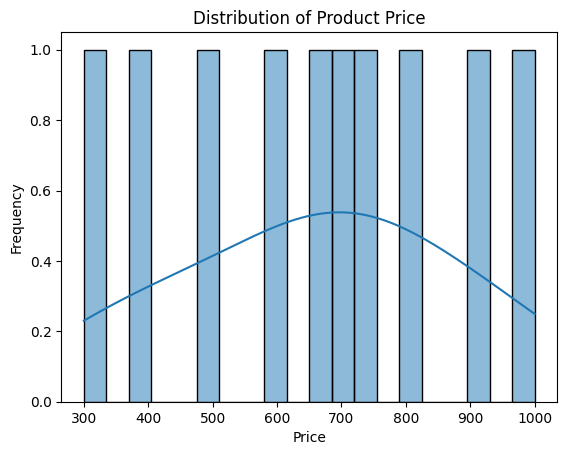

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df['Price'],bins=20,kde=True)
plt.title('Distribution of Product Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [12]:
with open('product.csv','r') as file:
    for i, line in enumerate(file):
        print(line.strip())
        if i == 5:
            break

ProductID,ProductName,Category,Price,Stock
1,ProductA,Electronics,500,50
2,ProductB,Electronics,700,30
3,ProductC,Furniture,300,20
4,ProductD,Furniture,900,15
5,ProductE,Clothing,400,100


In [14]:
print(df.head(4))

   ProductID ProductName     Category  Price  Stock
0          1    ProductA  Electronics    500     50
1          2    ProductB  Electronics    700     30
2          3    ProductC    Furniture    300     20
3          4    ProductD    Furniture    900     15


In [15]:
print(df['Category'].unique())

['Electronics' 'Furniture' 'Clothing' 'Beauty' 'Books']


In [16]:
print(df['ProductName'].unique())

['ProductA' 'ProductB' 'ProductC' 'ProductD' 'ProductE' 'ProductF'
 'ProductG' 'ProductH' 'ProductI' 'ProductJ']


In [17]:
df['Price'] = df['Price'].fillna(0)

In [18]:
df['Discounted_Price'] = df['Price'] * 0.9
print(df.head())

   ProductID ProductName     Category  Price  Stock  Discounted_Price
0          1    ProductA  Electronics    500     50             450.0
1          2    ProductB  Electronics    700     30             630.0
2          3    ProductC    Furniture    300     20             270.0
3          4    ProductD    Furniture    900     15             810.0
4          5    ProductE     Clothing    400    100             360.0


In [20]:
df['Price_Range'] = pd.cut(df['Price'],bins=[0,50,100,500],labels=['Low','Medium','High'])
print(df[['Price','Price_Range']].head())

   Price Price_Range
0    500        High
1    700         NaN
2    300        High
3    900         NaN
4    400        High


In [21]:
category_stats = df.groupby('Category')['Price'].agg(['mean','max','min'])
print(category_stats)

              mean   max  min
Category                     
Beauty       800.0  1000  600
Books        700.0   750  650
Clothing     600.0   800  400
Electronics  600.0   700  500
Furniture    600.0   900  300


In [22]:
product_count = df.groupby('Category').size()
print(product_count)

Category
Beauty         2
Books          2
Clothing       2
Electronics    2
Furniture      2
dtype: int64


In [23]:
sorted_df = df.sort_values(by=['Category','Price'],ascending=[True,False])
print(sorted_df)

   ProductID ProductName     Category  Price  Stock  Discounted_Price  \
7          8    ProductH       Beauty   1000     25             900.0   
6          7    ProductG       Beauty    600     40             540.0   
8          9    ProductI        Books    750     80             675.0   
9         10    ProductJ        Books    650     90             585.0   
5          6    ProductF     Clothing    800     60             720.0   
4          5    ProductE     Clothing    400    100             360.0   
1          2    ProductB  Electronics    700     30             630.0   
0          1    ProductA  Electronics    500     50             450.0   
3          4    ProductD    Furniture    900     15             810.0   
2          3    ProductC    Furniture    300     20             270.0   

  Price_Range  
7         NaN  
6         NaN  
8         NaN  
9         NaN  
5         NaN  
4        High  
1         NaN  
0        High  
3         NaN  
2        High  


In [24]:
filtered_df = df[(df['Price'] > 50) & (df['Category'])]
print(filtered_df)

   ProductID ProductName     Category  Price  Stock  Discounted_Price  \
0          1    ProductA  Electronics    500     50             450.0   
1          2    ProductB  Electronics    700     30             630.0   
2          3    ProductC    Furniture    300     20             270.0   
3          4    ProductD    Furniture    900     15             810.0   
4          5    ProductE     Clothing    400    100             360.0   
5          6    ProductF     Clothing    800     60             720.0   
6          7    ProductG       Beauty    600     40             540.0   
7          8    ProductH       Beauty   1000     25             900.0   
8          9    ProductI        Books    750     80             675.0   
9         10    ProductJ        Books    650     90             585.0   

  Price_Range  
0        High  
1         NaN  
2        High  
3         NaN  
4        High  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  


In [25]:
category_avg_price = df.groupby('Category')['Price'].mean()

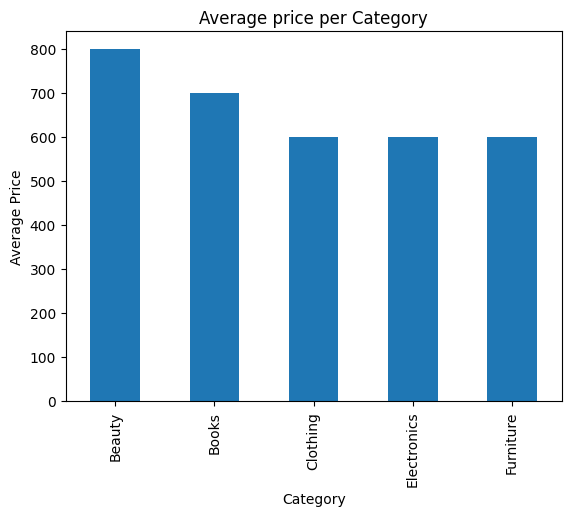

In [26]:
category_avg_price.plot(kind='bar',title='Average price per Category',ylabel='Average Price',xlabel='Category')
plt.show()

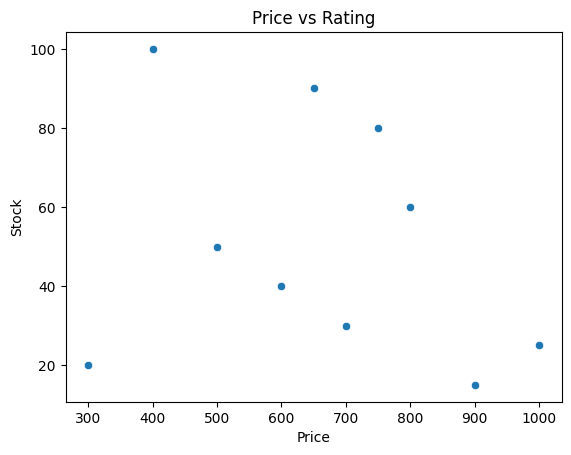

In [28]:
sns.scatterplot(data=df,x='Price',y='Stock')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Stock')
plt.show()

In [29]:
df.to_csv('Modified_product.csv',index=False)

In [30]:
with open('product.csv','r') as file:
    for i,line in enumerate(file):
        print(line.strip())
        if  i == 5:
            break

ProductID,ProductName,Category,Price,Stock
1,ProductA,Electronics,500,50
2,ProductB,Electronics,700,30
3,ProductC,Furniture,300,20
4,ProductD,Furniture,900,15
5,ProductE,Clothing,400,100
